In [51]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [52]:
dataset = MNIST(root='data/', download=True)

In [53]:
len(dataset)
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [54]:
!pip install matplotlib

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


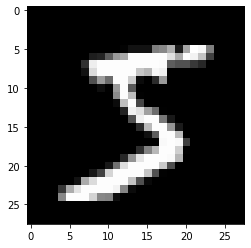

In [56]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


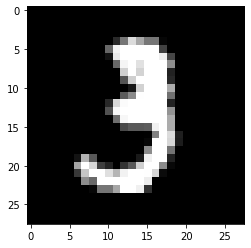

In [57]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [58]:
import torchvision.transforms as transforms

In [59]:
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [60]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [61]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


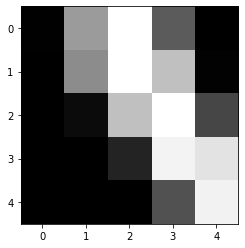

In [62]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [63]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [64]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [65]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [66]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0300,  0.0290,  0.0113,  ..., -0.0157,  0.0215,  0.0335],
        [ 0.0304,  0.0080, -0.0015,  ...,  0.0129, -0.0280,  0.0234],
        [-0.0212, -0.0089,  0.0343,  ..., -0.0180,  0.0091, -0.0040],
        ...,
        [-0.0309,  0.0190, -0.0055,  ..., -0.0355,  0.0204, -0.0348],
        [ 0.0138,  0.0039,  0.0123,  ..., -0.0260, -0.0148, -0.0255],
        [ 0.0261, -0.0064, -0.0314,  ..., -0.0171, -0.0220,  0.0247]],
       requires_grad=True)

In [67]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0236,  0.0302, -0.0232,  0.0098, -0.0037, -0.0255, -0.0061,  0.0342,
        -0.0177, -0.0057], requires_grad=True)

In [68]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [70]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [71]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [72]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-1.2135e-02, -1.0856e-02,  2.9431e-02,  ..., -1.1818e-02,
           1.7103e-02, -3.2882e-02],
         [ 5.3547e-03, -1.8924e-02, -7.2491e-03,  ..., -4.6865e-03,
          -1.9693e-03, -1.8314e-02],
         [ 2.2697e-05, -3.3160e-02,  2.8079e-02,  ...,  3.0965e-02,
           2.5627e-02,  2.3085e-02],
         ...,
         [ 3.0963e-02, -2.1002e-02,  3.2456e-02,  ..., -4.0557e-03,
           6.3679e-03, -1.1180e-02],
         [ 2.4227e-02,  2.6682e-03, -8.0003e-03,  ..., -1.5365e-02,
           1.6938e-02, -2.9480e-02],
         [ 8.1626e-03, -1.3587e-02, -1.7932e-02,  ...,  6.9552e-03,
           6.1472e-03,  1.4154e-02]], requires_grad=True),
 Parameter containing:
 tensor([-0.0109,  0.0299,  0.0257, -0.0033, -0.0211,  0.0092,  0.0306, -0.0228,
         -0.0092,  0.0303], requires_grad=True)]

In [73]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.0494, -0.4735, -0.1853,  0.1019, -0.1024, -0.5496, -0.2200, -0.2135,
         -0.0109,  0.4540],
        [-0.2809, -0.0613,  0.0398, -0.1044, -0.1495, -0.3037, -0.1822, -0.2031,
         -0.0590,  0.1467]])


In [74]:
import torch.nn.functional as F

In [77]:
outputs[:2]

tensor([[-0.0494, -0.4735, -0.1853,  0.1019, -0.1024, -0.5496, -0.2200, -0.2135,
         -0.0109,  0.4540],
        [-0.2809, -0.0613,  0.0398, -0.1044, -0.1495, -0.3037, -0.1822, -0.2031,
         -0.0590,  0.1467]], grad_fn=<SliceBackward>)

In [79]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[2]).item())

Sample probabilities:
 tensor([[0.1038, 0.0679, 0.0906, 0.1208, 0.0985, 0.0630, 0.0875, 0.0881, 0.1079,
         0.1718],
        [0.0840, 0.1047, 0.1158, 0.1002, 0.0958, 0.0821, 0.0927, 0.0908, 0.1049,
         0.1289]])
Sum:  1.0


In [87]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([9, 9, 3, 8, 9, 9, 9, 3, 3, 8, 9, 9, 3, 9, 0, 3, 9, 8, 8, 8, 5, 0, 0, 0,
        0, 3, 6, 0, 9, 8, 3, 9, 9, 9, 9, 9, 6, 9, 8, 2, 9, 0, 8, 8, 6, 9, 3, 0,
        3, 8, 3, 9, 8, 3, 3, 3, 3, 0, 3, 3, 9, 0, 8, 9, 6, 8, 9, 9, 9, 3, 9, 8,
        3, 9, 0, 9, 8, 8, 0, 9, 3, 9, 9, 0, 9, 8, 1, 8, 3, 9, 0, 3, 2, 3, 9, 9,
        3, 3, 9, 2, 8, 9, 1, 9, 9, 9, 8, 9, 9, 9, 9, 5, 9, 8, 8, 9, 7, 3, 9, 0,
        3, 9, 9, 9, 3, 9, 9, 9])
tensor([0.1718, 0.1289, 0.1299, 0.1391, 0.1405, 0.1405, 0.1278, 0.1260, 0.1149,
        0.1476, 0.1154, 0.1659, 0.1293, 0.1182, 0.1246, 0.1283, 0.1523, 0.1499,
        0.1224, 0.1441, 0.1287, 0.1395, 0.1414, 0.1286, 0.1397, 0.1346, 0.1327,
        0.1306, 0.1466, 0.1258, 0.1210, 0.1404, 0.1210, 0.1359, 0.1266, 0.1142,
        0.1250, 0.1240, 0.1250, 0.1302, 0.1399, 0.1261, 0.1209, 0.1359, 0.1122,
        0.1388, 0.1607, 0.1324, 0.1228, 0.1234, 0.1274, 0.1436, 0.1307, 0.1237,
        0.1335, 0.1227, 0.1366, 0.1268, 0.1327, 0.1323, 0.1432, 0.1393, 0.1317,
       

In [97]:
max_probs.shape

torch.Size([128])

In [98]:
preds.shape

torch.Size([128])

In [88]:
labels

tensor([3, 5, 1, 8, 8, 7, 0, 3, 5, 9, 5, 9, 2, 1, 2, 2, 4, 2, 1, 0, 7, 2, 6, 6,
        4, 4, 2, 4, 0, 7, 4, 5, 0, 9, 1, 7, 2, 8, 7, 6, 0, 0, 5, 5, 2, 5, 8, 0,
        6, 7, 1, 7, 0, 3, 8, 4, 1, 4, 1, 4, 8, 0, 4, 7, 4, 6, 8, 7, 7, 4, 8, 6,
        8, 8, 0, 1, 8, 7, 0, 1, 1, 3, 1, 9, 7, 2, 4, 5, 1, 4, 6, 1, 6, 2, 7, 5,
        0, 3, 6, 5, 7, 5, 4, 9, 7, 5, 1, 5, 3, 7, 5, 9, 7, 1, 4, 0, 2, 4, 1, 5,
        0, 3, 8, 5, 6, 5, 9, 0])

In [90]:
outputs[:2]

tensor([[-0.0494, -0.4735, -0.1853,  0.1019, -0.1024, -0.5496, -0.2200, -0.2135,
         -0.0109,  0.4540],
        [-0.2809, -0.0613,  0.0398, -0.1044, -0.1495, -0.3037, -0.1822, -0.2031,
         -0.0590,  0.1467]], grad_fn=<SliceBackward>)

In [91]:
torch.sum(preds == labels)

tensor(14)

In [92]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [102]:
accuracy(outputs, labels)

tensor(0.1094)

In [106]:
loss_fn = F.cross_entropy

In [107]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3500, grad_fn=<NllLossBackward>)


In [109]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [110]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [111]:
result0 = evaluate(model, val_loader)

{'val_loss': 2.353299379348755, 'val_acc': 0.08742088824510574}

In [108]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [112]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

/opt/conda/lib/python3.7/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


Epoch [0], val_loss: 1.9689, val_acc: 0.6123
Epoch [1], val_loss: 1.6961, val_acc: 0.7173
Epoch [2], val_loss: 1.4929, val_acc: 0.7552
Epoch [3], val_loss: 1.3394, val_acc: 0.7793
Epoch [4], val_loss: 1.2214, val_acc: 0.7945


In [118]:
res = model.forward(images)
accuracy(res,labels)

tensor(0.7734)

In [119]:
history1 = fit(5, 0.001, model, train_loader, val_loader)
history2 = fit(5, 0.001, model, train_loader, val_loader)
history3 = fit(5, 0.001, model, train_loader, val_loader)
history4 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 1.1285, val_acc: 0.8047
Epoch [1], val_loss: 1.0540, val_acc: 0.8151
Epoch [2], val_loss: 0.9928, val_acc: 0.8202
Epoch [3], val_loss: 0.9420, val_acc: 0.8255
Epoch [4], val_loss: 0.8989, val_acc: 0.8302
Epoch [0], val_loss: 0.8622, val_acc: 0.8337
Epoch [1], val_loss: 0.8302, val_acc: 0.8379
Epoch [2], val_loss: 0.8022, val_acc: 0.8395
Epoch [3], val_loss: 0.7775, val_acc: 0.8421
Epoch [4], val_loss: 0.7555, val_acc: 0.8448
Epoch [0], val_loss: 0.7358, val_acc: 0.8478
Epoch [1], val_loss: 0.7179, val_acc: 0.8497
Epoch [2], val_loss: 0.7018, val_acc: 0.8513
Epoch [3], val_loss: 0.6871, val_acc: 0.8523
Epoch [4], val_loss: 0.6735, val_acc: 0.8537
Epoch [0], val_loss: 0.6611, val_acc: 0.8547
Epoch [1], val_loss: 0.6496, val_acc: 0.8561
Epoch [2], val_loss: 0.6390, val_acc: 0.8577
Epoch [3], val_loss: 0.6290, val_acc: 0.8584
Epoch [4], val_loss: 0.6198, val_acc: 0.8604


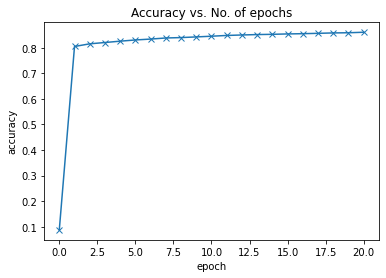

In [120]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [121]:
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


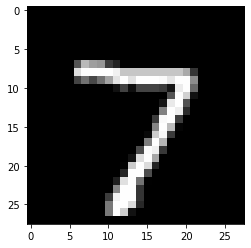

In [123]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [134]:
def predict_image(img, model):
    xb = img
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


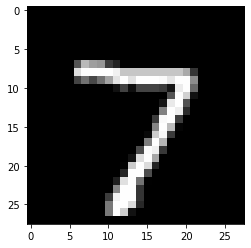

In [140]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


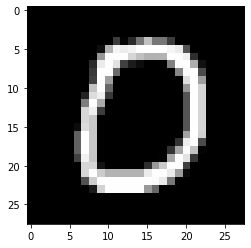

In [142]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


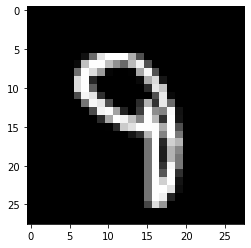

In [143]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [144]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.5898292064666748, 'val_acc': 0.866992175579071}

In [159]:
model.linear(test_dataset[0][0].reshape(-1,784))

tensor([[-0.3387, -2.2464, -0.5987,  0.1278, -0.1105, -0.4244, -1.9663,  4.7669,
         -0.3347,  1.5640]], grad_fn=<AddmmBackward>)